# Predicting heart disease using machine learing
This notebook looks into various Python based machine learning and data-science
libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes

We're going to take the following approach:
1. Problem Defination
2. Data 
3. Evaluation
4. Features
5. Modelling
6. Experimenting

## 1. Problem Defination 
In a statement ,
> Given clinical parameters about a patients,  can we predict whether or not they have heart disease?

## 2. Data

The original data came from the Clevaland data fron the UCI Machine Learning  Repository.

## 3. Evaluation

> If we can reach 95% accuracy at predicting at  predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features
The dataset consists of 303 individuals data. There are 14 columns in the dataset, which are described below.

1. `Age`: displays the age of the individual.
2. `Sex`: displays the gender of the individual using the following format :
    1 = male
    0 = female
3. `Chest-pain type`: displays the type of chest-pain experienced by the       individual using the following format :
    * 1 = typical angina
    * 2 = atypical angina
    * 3 = non — anginal pain
    * 4 = asymptotic
4. `Resting Blood Pressure`: displays the resting blood pressure value of an   individual in mmHg (unit)
5. `Serum Cholestrol`: displays the serum cholesterol in mg/dl (unit)
6. Fasting Blood Sugar`: compares the fasting blood sugar value of an individual  with 120mg/dl.
    If fasting blood sugar > 120mg/dl then :
    * 1 (true)
    else :
    * 0 (false)
7. `Resting ECG` : displays resting electrocardiographic results
    * 0 = normal
    * 1 = having ST-T wave abnormality
    * 2 = left ventricular hyperthrophy
8. `Max heart rate achieved` : displays the max heart rate achieved by an individual.
9. `Exercise induced angina` :
    * 1 = yes
    * 0 = no
10. `ST depression induced by exercise relative to rest`: displays the value which is an integer or float.
11. `Peak exercise ST segment` :
    1 = upsloping
    2 = flat
    3 = downsloping
12. `Number of major vessels (0–3) colored by flourosopy` : displays the value as integer or float.
13. `Thal` : displays the thalassemia :
    * 3 = normal
    * 6 = fixed defect
    * 7 = reversible defect
14. `Diagnosis of heart disease` : Displays whether the individual is suffering from heart disease or not :
    0 = absence
    1, 2, 3, 4 = present.


### Preparing the tool
we're going to import pandas, numpy, matplotlib, scikit-learn

In [1]:
## Import all the tools we need

# Regular EDA(exploratory data analysis) and plotting libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#Models from scikit-learn 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

### Load data

In [2]:
df = pd.read_csv('heart-disease.csv')
df.shape

(303, 14)

## Data Exploration (Exploratory Data Analysis or EDA)
The goal here is to find out more about data and become the subject matter export on the datasets you're working with

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do we deal with it?
4. Where are the outliers and how should we care about them?
5. How can we add, check and remove features to get more with our data?

In [3]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

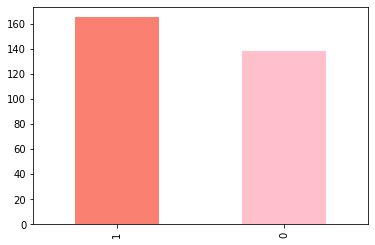

In [4]:
df['target'].value_counts().plot(kind='bar',color=['salmon','pink']);

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
#Are there any missing value?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### heart disease frequency according to sex

In [7]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

Text(0.5, 1.0, 'Heart Disease Frequency for sex')

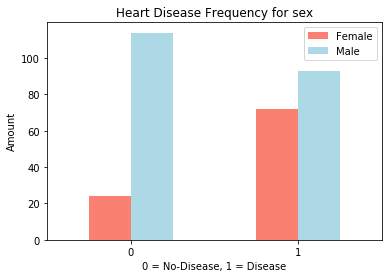

In [8]:
#Compare target column with sex column
pd.crosstab(df.sex,df.target)

#Plotting the data
pd.crosstab(df.target,df.sex).plot(kind='bar',color=['salmon','lightblue'])
plt.xlabel("0 = No-Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);
plt.title("Heart Disease Frequency for sex")

### Comparing Age vs Max HeartBeat(thalach)

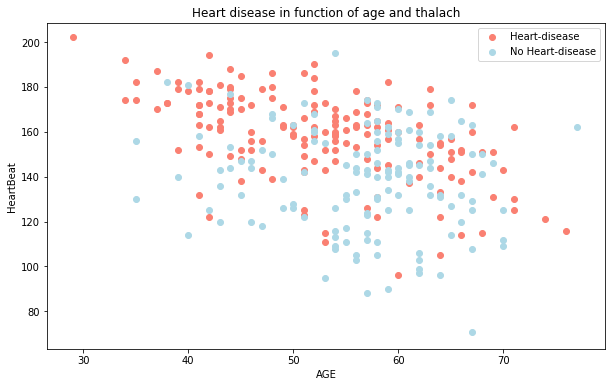

In [9]:
#Create the figure
plt.figure(figsize=(10,6))

#Comparing the positives
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c='salmon');

#Comapring the negetives
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c='lightblue');


#Add some helpful info
plt.title("Heart disease in function of age and thalach")
plt.xlabel("AGE")
plt.ylabel("HeartBeat")
plt.legend(['Heart-disease',"No Heart-disease"]);

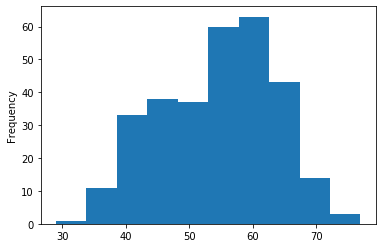

In [10]:
#Let's check the distributionof age 
df.age.plot.hist();

### Heart Disease Frequency per chest pain type

In [11]:
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

* 0 = typical angina
* 1 = atypical angina
* 2 = non — anginal pain
* 3 = asymptotic

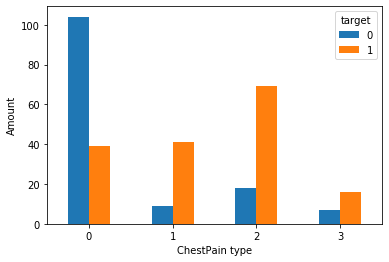

In [12]:
pd.crosstab(df.cp,df.target).plot.bar();

#Help info
plt.xlabel("ChestPain type")
plt.ylabel('Amount');
plt.xticks(rotation=0);

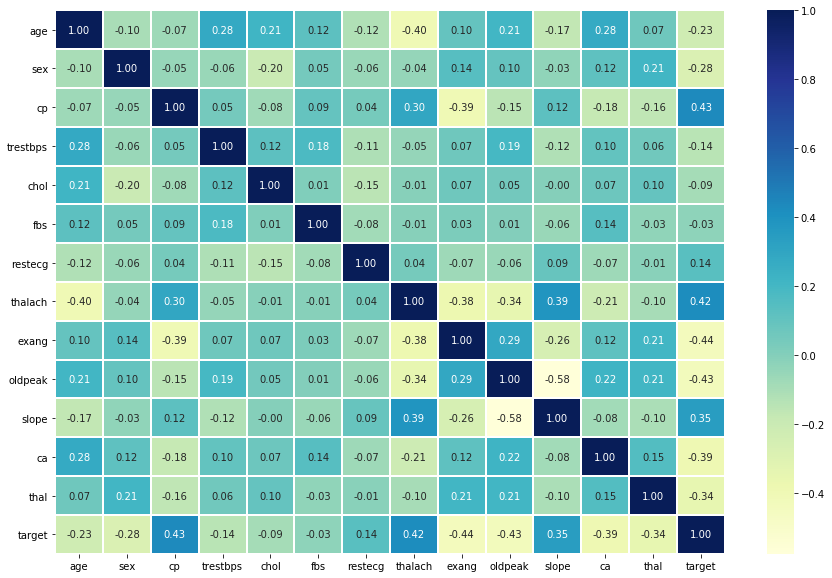

In [13]:
#let's make coorelation matrix 
matrix = df.corr()

#Let's make it prettier
fig, ax = plt.subplots(figsize=(15,10));
ax = sns.heatmap(matrix,
            cmap="YlGnBu",
            linewidths='1',
            fmt='.2f',
            annot=True)


# Modelling




In [14]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:
# Split our data into X and y 
X = df.drop('target',axis=1)
y = df['target']

In [16]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [17]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [18]:
np.random.seed(42)
#Create TRain and test data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [19]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


Now we've got our data into train and test we'll built a machine learning model 

We'll train it(find pattern)

and then test it(Use those patterns)

We're going to see three models 
1. Logistics Regression 
2. K-Neighbors Classifier
3. Random Forest Classifier

Let's Put model in a dictionary to Obey the Rule  "D R Y"

In [20]:
#BaseLine Class
models = {
        "Logistics_Regression": LogisticRegression(),
        "K-Nearest_Classifier": KNeighborsClassifier(),
        "RandomForest Classifier": RandomForestClassifier()
}
results = {}

def evaluate(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    """
    This Function Fits and Evaluate our model
    Parameter Required:
    models: The Machine Learning model
    X_train: X_train data/training data
    X_test: X_test data/test data
    y_train:y_train data/train labels
    y_test: y_test data/test labels
    
    """
    for model_name,model in models.items():
        #Fit the model
        model.fit(X_train,y_train)
        #Predict the model
        y_preds = model.predict(X_test)
        results[model_name] = model.score(X_test,y_test)
    return results

In [21]:
model_comparison = evaluate(models,X_train, X_test, y_train, y_test)
model_comparison

F:\Heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'Logistics_Regression': 0.8852459016393442,
 'K-Nearest_Classifier': 0.6885245901639344,
 'RandomForest Classifier': 0.8360655737704918}

### Model comparison


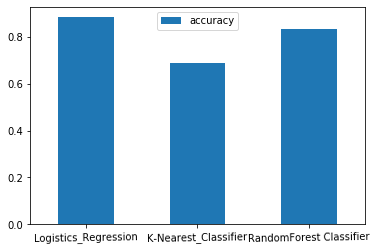

In [22]:
model_comparison = pd.DataFrame(model_comparison,index=['accuracy'])
model_comparison.T.plot(kind='bar'); #Transpose otherwise it looks weird
plt.xticks(rotation=1);

Now we've got our model which is baseline model but baseline model is not something are next steps 
based on... 

We'll Look at the following
1. Hyperparameter
2. Feature Importance
3. Precision 
4. Recall
5. F1 score
6. Confusion Matrix
7. Classification Report
8. ROC curve

### Hyperparameter


In [23]:
train_score = []
test_score = []

for i in range(1,21):
    #Set the KNN Instance
    knn = KNeighborsClassifier()
    #Set the parameters
    knn.set_params(n_neighbors=i)
    #Fit the model
    knn.fit(X_train,y_train)
    #Append into train_score list
    train_score.append(knn.score(X_test,y_test))
    #Append into test_score list
    test_score.append(knn.score(X_train,y_train))

    

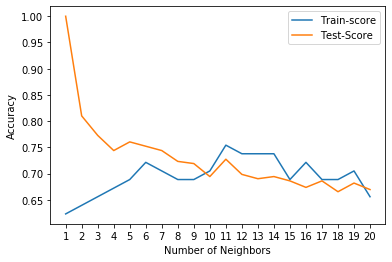

In [24]:
#let's visualise train_score and test_score
plt.plot(range(1,21),train_score,label='Train-score')
plt.plot(range(1,21),test_score,label='Test-Score')
plt.xticks(np.arange(1,21,1))
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy');

### Hyperparameter tunning with RandomSearchCV
we're going to tune:

* RandomForestClassifier()
* Logistic Regression()

In [25]:
#Create a Hyperparameter grid with logistic regression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

#Create a Hyperparameter grid for RandomForestClassifier()
rf_grid = {"n_estimators": np.arange(10,1000,50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20 , 2)}

#Initialise RandomSearchCV for logistic Regression
np.random.seed(42)
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                log_reg_grid,
                                cv=5,
                                verbose=2)
#Fit the model
rs_log_reg.fit(X_train,y_train)






Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] solver=liblinear, C=0.0001 ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... solver=liblinear, C=0.0001, total=   0.2s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] ....................... solver=liblinear, C=0.0001, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] ....................... solver=liblinear, C=0.0001, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] ....................... solver=liblinear, C=0.0001, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] ....................... solver=liblinear, C=0.0001, total=   0.0s
[CV] solver=liblinear, C=1438.44988828766 ............................
[CV] ............. solver=liblinear, C=1438.44988828766, total=   0.0s
[CV] solver=liblinear, C=1438.44988828766 ............................
[CV] ............. solver=liblinear, C=1438.44988828766, total=   0.0s
[CV] solver=liblinear, C=1438.44988828766 ............................
[CV] .

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s



[CV] solver=liblinear, C=0.23357214690901212 .........................
[CV] .......... solver=liblinear, C=0.23357214690901212, total=   0.0s
[CV] solver=liblinear, C=0.23357214690901212 .........................
[CV] .......... solver=liblinear, C=0.23357214690901212, total=   0.0s
[CV] solver=liblinear, C=0.23357214690901212 .........................
[CV] .......... solver=liblinear, C=0.23357214690901212, total=   0.0s
[CV] solver=liblinear, C=0.23357214690901212 .........................
[CV] .......... solver=liblinear, C=0.23357214690901212, total=   0.0s
[CV] solver=liblinear, C=0.012742749857031334 ........................
[CV] ......... solver=liblinear, C=0.012742749857031334, total=   0.0s
[CV] solver=liblinear, C=0.012742749857031334 ........................
[CV] ......... solver=liblinear, C=0.012742749857031334, total=   0.0s
[CV] solver=liblinear, C=0.012742749857031334 ........................
[CV] ......... solver=liblinear, C=0.012742749857031334, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.7s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [26]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [27]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

In [28]:
#Let's tune RandomForestClassifier()
np.random.seed(42)
rs_ran_reg = RandomizedSearchCV(RandomForestClassifier(),
                                rf_grid,
                                cv=5,
                                verbose=2)
rs_ran_reg.fit(X_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None 
[CV]  n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None, total=   0.1s
[CV] n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None 
[CV]  n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None, total=   0.0s
[CV] n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None 
[CV]  n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None, total=   0.0s
[CV] n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None, total=   0.0s
[CV] n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None 
[CV]  n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None, total=   0.0s
[CV] n_estimators=510, min_samples_split=18, min_samples_leaf=19, max_depth=5 
[CV]  n_estimators=510, min_samples_split=18, min_samples_leaf=19, max_depth=5, total=   1.3s
[CV] n_estimators=510, min_samples_split=18, min_samples_leaf=19, max_depth=5 
[CV]  n_estimators=510, min_samples_split=18, min_samples_leaf=19, max_depth=5, total=   1.3s
[CV] n_estimators=510, min_samples_split=18, min_samples_leaf=19, max_depth=5 
[CV]  n_estimators=510, min_samples_split=18, min_samples_leaf=19, max_depth=5, total=   1.3s
[CV] n_estimators=510, min_samples_split=18, min_samples_leaf=19, max_depth=5 
[CV]  n_estimators=510, min_samples_split=18, min_samples_leaf=19, max_depth=5, total=   1.3s
[CV] n_estimators=510, min_samples_spl

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.0min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [29]:
rs_ran_reg.best_params_

{'n_estimators': 310,
 'min_samples_split': 2,
 'min_samples_leaf': 19,
 'max_depth': 5}

In [30]:
rs_ran_reg.score(X_test,y_test)

0.8688524590163934

### Hyperparameter tuning with  GridsearchCV
Now we have seen Logistic Regression proves to be the best we'll push it using GridSearchCV

In [31]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [32]:
#Different parameters for our Logistlic Regression Model 
log_reg_grid = {"C": np.logspace(-4, 4, 30),
              "solver":["liblinear"],
              }

#Setup Hyperparameter Search for our Model
gs_log_reg = GridSearchCV(LogisticRegression(),
                          log_reg_grid,
                          cv=5,
                          verbose=2)

#Fit the Model 
gs_log_reg.fit(X_train,y_train)
                          


Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] C=0.0001, solver=liblinear ......................................
[CV] ....................... C=0.0001, solver=liblinear, total=   0.0s
[CV] C=0.0001, solver=liblinear ......................................
[CV] ....................... C=0.0001, solver=liblinear, total=   0.0s
[CV] C=0.0001, solver=liblinear ......................................
[CV] ....................... C=0.0001, solver=liblinear, total=   0.0s
[CV] C=0.0001, solver=liblinear ......................................
[CV] ....................... C=0.0001, solver=liblinear, total=   0.0s
[CV] C=0.0001, solver=liblinear ......................................
[CV] ....................... C=0.0001, solver=liblinear, total=   0.0s
[CV] C=0.00018873918221350977, solver=liblinear ......................
[CV] ....... C=0.00018873918221350977, solver=liblinear, total=   0.0s
[CV] C=0.00018873918221350977, solver=liblinear ......................
[CV] ....... C=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.0006723357536499335, solver=liblinear .......................
[CV] ........ C=0.0006723357536499335, solver=liblinear, total=   0.0s
[CV] C=0.0006723357536499335, solver=liblinear .......................
[CV] ........ C=0.0006723357536499335, solver=liblinear, total=   0.0s
[CV] C=0.0006723357536499335, solver=liblinear .......................
[CV] ........ C=0.0006723357536499335, solver=liblinear, total=   0.0s
[CV] C=0.0012689610031679222, solver=liblinear .......................
[CV] ........ C=0.0012689610031679222, solver=liblinear, total=   0.0s
[CV] C=0.0012689610031679222, solver=liblinear .......................
[CV] ........ C=0.0012689610031679222, solver=liblinear, total=   0.0s
[CV] C=0.0012689610031679222, solver=liblinear .......................
[CV] ........ C=0.0012689610031679222, solver=liblinear, total=   0.0s
[CV] C=0.0012689610031679222, solver=liblinear .......................
[CV] ........ C=0.0012689610031679222, solver=liblinear, total=   0.0s
[CV] 

[CV] ........... C=1.3738237958832638, solver=liblinear, total=   0.0s
[CV] C=2.592943797404667, solver=liblinear ...........................
[CV] ............ C=2.592943797404667, solver=liblinear, total=   0.0s
[CV] C=2.592943797404667, solver=liblinear ...........................
[CV] ............ C=2.592943797404667, solver=liblinear, total=   0.0s
[CV] C=2.592943797404667, solver=liblinear ...........................
[CV] ............ C=2.592943797404667, solver=liblinear, total=   0.0s
[CV] C=2.592943797404667, solver=liblinear ...........................
[CV] ............ C=2.592943797404667, solver=liblinear, total=   0.0s
[CV] C=2.592943797404667, solver=liblinear ...........................
[CV] ............ C=2.592943797404667, solver=liblinear, total=   0.0s
[CV] C=4.893900918477489, solver=liblinear ...........................
[CV] ............ C=4.893900918477489, solver=liblinear, total=   0.0s
[CV] C=4.893900918477489, solver=liblinear ...........................
[CV] .

[CV] ............ C=5298.316906283702, solver=liblinear, total=   0.0s
[CV] C=5298.316906283702, solver=liblinear ...........................
[CV] ............ C=5298.316906283702, solver=liblinear, total=   0.0s
[CV] C=5298.316906283702, solver=liblinear ...........................
[CV] ............ C=5298.316906283702, solver=liblinear, total=   0.0s
[CV] C=5298.316906283702, solver=liblinear ...........................
[CV] ............ C=5298.316906283702, solver=liblinear, total=   0.0s
[CV] C=5298.316906283702, solver=liblinear ...........................
[CV] ............ C=5298.316906283702, solver=liblinear, total=   0.0s
[CV] C=10000.0, solver=liblinear .....................................
[CV] ...................... C=10000.0, solver=liblinear, total=   0.0s
[CV] C=10000.0, solver=liblinear .....................................
[CV] ...................... C=10000.0, solver=liblinear, total=   0.0s
[CV] C=10000.0, solver=liblinear .....................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    2.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 1.8...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5

In [33]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [34]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

### Evaluating our tuned ML model , beyond Accuracy

* Classsifiction_report
2. Precision
3. Recall
4. F1 score
5. ROC curve
6. AUC
7. Confusion Matrix

    > all this probably using with Cross-Validation

In [35]:
#Make the predictions
y_preds = gs_log_reg.predict(X_test)

In [36]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

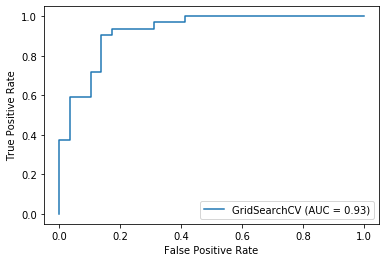

In [37]:
#Plot ROC curve
plot_roc_curve(gs_log_reg,X_test,y_test);

In [38]:
#Confusion Matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


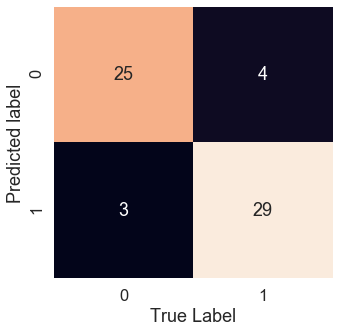

In [39]:
#let's visualize using seabornmap
sns.set(font_scale=1.5)
def plot_conf(y_test,y_preds):
    """
    Plots a nice Looking confusion Matrix
    """
    fig, ax = plt.subplots(figsize=(5,5))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                     annot = True,
                     cbar = False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted label")
    
plot_conf(y_test,y_preds)

In [40]:
#Classification Report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate cross - validation using cross_val _score


In [41]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [42]:
scores = ['accuracy', 'precision',  'recall', 'f1'] 
cv_scoring = []

In [43]:
clf = LogisticRegression(C= 0.20433597178569418, 
                         solver= 'liblinear')
def scoring(scores):
    """
    This function gives different scoring parameters mean result
    """
    for score in scores:
        cv_scoring.append(np.mean(cross_val_score(clf, 
                X_train,
                y_train,
                cv=5,
                scoring=score,
                verbose=True
                )))
    print(f"Scoring parameters \n Accuracy : {cv_scoring[0]*100:.2f}% \n Precision : {cv_scoring[1]*100:.2f}% \n Recall : {cv_scoring[2]*100:.2f}% \n F1-Score : {cv_scoring[3]*100:.2f}%")
          
          
          
          
         
        
 


    
    


In [44]:
scoring(scores)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Scoring parameters 
 Accuracy : 83.05% 
 Precision : 81.57% 
 Recall : 89.46% 
 F1-Score : 85.28%


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


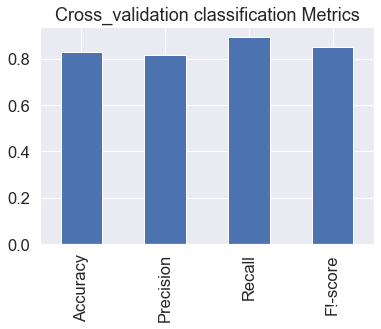

In [45]:
#Let's visualize our scoring paraameters
cv_bar = pd.DataFrame({"Accuracy":cv_scoring[0], 
                       "Precision": cv_scoring[1], 
                       "Recall": cv_scoring[2], 
                       "F!-score": cv_scoring[3]},
                      index=[0]
                      )

cv_bar.T.plot.bar(title="Cross_validation classification Metrics",legend=False);

### Feature importance
Feature Importance is another way of asking which feature contributed the most for the outcome of our model and How did they contribute?


In [50]:
# fit the model 
clf = LogisticRegression(C=0.20433597178569418, 
                          solver='liblinear')
clf.fit(X_train,y_train);

In [51]:
clf.coef_

array([[ 0.00316728, -0.86044655,  0.66067042, -0.01156993, -0.00166374,
         0.04386109,  0.31275847,  0.02459361, -0.60413083, -0.56862804,
         0.4505163 , -0.63609898, -0.67663378]])

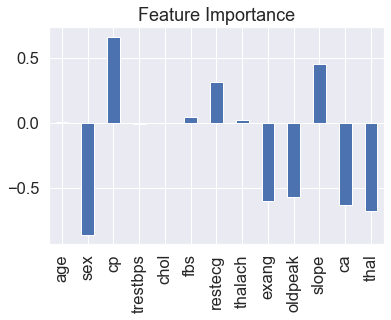

In [72]:
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))


#Let's visualize this
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False);